In [1]:
from keras import Sequential
import keras
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Lambda
from keras.regularizers import L2
import skimage
import numpy as np
from matplotlib import pyplot as plt
import imageio
import glob

In [2]:
label_names = ["Heart", "Oblong", "Oval", "Round", "Square"]

In [2]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    "face_shape_data/training_set",
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    validation_split=0.15,
    subset="training",
    seed=42,
)

Found 18354 files belonging to 5 classes.
Using 15601 files for training.


In [3]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    "face_shape_data/training_set",
    image_size=(128, 128),
    crop_to_aspect_ratio=True,
    validation_split=0.15,
    subset="validation",
    shuffle=True,
    seed=42,
)

Found 18354 files belonging to 5 classes.
Using 2753 files for validation.


In [4]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    "test/test", image_size=(128, 128), crop_to_aspect_ratio=True, seed=41
)

Found 385 files belonging to 5 classes.


Existing Model:


In [2]:
model = keras.saving.load_model(
    "face_shape_models/face_shape_identifier.keras", safe_mode=False
)

Model Definition:


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Dropout,
    Flatten,
    Dense,
    RandomZoom,
    RandomRotation,
)
from tensorflow.keras import regularizers

model = Sequential(
    [
        Input(shape=(128, 128, 3)),
        Lambda(lambda x: x / 128 - 1),
        Conv2D(32, [3, 3], activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        MaxPooling2D([2, 2], 2),
        Dropout(0.3),
        Conv2D(64, [3, 3], activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        MaxPooling2D([2, 2], 2),
        Dropout(0.3),
        Conv2D(
            128, [3, 3], activation="relu", kernel_regularizer=regularizers.l2(0.01)
        ),
        MaxPooling2D([2, 2], 2),
        Dropout(0.3),
        Conv2D(
            256, [3, 3], activation="relu", kernel_regularizer=regularizers.l2(0.01)
        ),
        MaxPooling2D([2, 2], 2),
        Dropout(0.3),
        Conv2D(
            512, [3, 3], activation="relu", kernel_regularizer=regularizers.l2(0.01)
        ),
        MaxPooling2D([2, 2], 2),
        Dropout(0.3),
        Flatten(),
        Dense(5, activation="softmax"),
    ]
)

In [10]:
model.save_weights('fs_weights.weights.h5')

In [ ]:
adam_opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_opt,metrics=['accuracy'])
model_checkpoint = keras.callbacks.ModelCheckpoint(

    filepath="model_chkpt.keras",

    save_best_only=True

)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
hist = model.fit(train_ds, batch_size=25, epochs=100, verbose=True, validation_data=val_ds, callbacks=[model_checkpoint, early_stopping])

In [9]:
loss, accuracy = model.evaluate(test_ds)
print("Model Accuracy: ", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7568 - loss: 0.7832
Model Accuracy:  0.768831193447113


In [ ]:
model.save('saved_models/face_shape_identifier.keras')

In [8]:
from typing import Literal
from textwrap import dedent
def get_optimal_hairstyle(
    gender: Literal["male", "female"],
    face_shape: Literal["oval", "heart", "oblong", "round", "square"],
):
    if gender == "male":
        if face_shape == "oval":
            return {
                "recommendations": [
                    "buzz",
                    "textured quiff",
                    "pompadour",
                    "man bun",
                    "comb over",
                ],
                "explanation": dedent(
                    """
                    Oval faces tend to be symmetric and balanced, so most 
                    hairstyles will look good on oval faces. It's best to pick 
                    hairstyles that draw attention to your features and keep 
                    the hair off of your face. Avoid hairstyles that cover your 
                    forehead, as it will make you face look rounder.
                    """
                ),
            }
        elif face_shape == "round":
            return {
                "recommendations": ["slick back", "skin fades", "spiky hair"],
                "explanation": dedent(
                    """
                    Round faces are best fitted with hairstyles that are 
                    short on the sides but add height or volume, 
                    to create the illusion that the face is longer.
                    """
                ),
            }
        elif face_shape == "oblong":
            return {
                "recommendations": ["side part", "brush up", "short spiky hair"],
                "explanation": dedent(
                    """
                    Oblong faces are long, so you should try 
                    shorter haircuts to avoid making your face look even longer.
                    """
                ),
            }
        elif face_shape == "heart":
            return {
                "recommendations": [
                    "textured crop",
                    "side swept bangs",
                    "pompadour",
                    "crew cut",
                    "ivy league",
                ],
                "explanation": dedent(
                    """
                    Heart-shaped faces tend to have a wider forehead 
                    and a narrower chin, so hairstyles that add volume around the 
                    chin or soften the forehead are ideal. Side-swept styles or 
                    longer hair on the sides can help balance the proportions of 
                    the face, whiletextured or voluminous styles on top can draw 
                    attention away from the forehead.
                    """
                ),
            }
        elif face_shape == "square":
            return {
                "recommendations": [
                    "textured quiff",
                    "side part",
                    "ivy league",
                    "fade",
                    "comb over",
                ],
                "explanation": dedent(
                    """
                    Square faces are angular, so softening the sharp 
                    lines with styles that add height and texture is a good idea. 
                    Styles that are longer on top with short sides or fades work well 
                    to balance the strong jawline. Avoid heavy bangs or blunt cuts 
                    that emphasize the square shape.
                    """
                ),
            }

    if gender == "female":
        if face_shape == "oval":
            return {
                "recommendations": [
                    "long waves",
                    "bob cut",
                    "pixie cut",
                    "soft curls",
                    "side-swept bangs",
                ],
                "explanation": dedent(
                    """
                    Oval faces are well-balanced, so most hairstyles 
                    work. However, styles that highlight the features, such as soft 
                    curls or waves, will enhance the natural symmetry. Bobs and pixie 
                    cuts are great for accentuating facial structure. Side-swept bangs 
                    can add a bit of volume and texture without overwhelming the face.
                    """
                ),
            }
        elif face_shape == "round":
            return {
                "recommendations": [
                    "long layers",
                    "side part",
                    "angular bob",
                    "textured waves",
                ],
                "explanation": dedent(
                    """Round faces are best suited for hairstyles that 
                    add height and volume on top, creating the illusion of a longer 
                    face. Long layers or waves add dimension and texture, while side 
                    parts and angular bobs can add sharpness to the face and draw  
                    attention away from the width.
                    """
                ),
            }
        elif face_shape == "oblong":
            return {
                "recommendations": [
                    "soft waves",
                    "layered bob",
                    "shaggy bob",
                    "side-swept bangs",
                ],
                "explanation": dedent(
                    """For oblong faces, it's best to avoid too much 
                    length. Hairstyles that add volume around the cheeks, like soft 
                    waves or layered bobs, work best. Side-swept bangs can help 
                    balance the long shape of the face and create a softer silhouette.
                    """
                ),
            }
        elif face_shape == "heart":
            return {
                "recommendations": [
                    "long layers with volume",
                    "bob with soft waves",
                    "side-swept bangs",
                    "pixie cut with volume",
                    "asymmetrical lob",
                ],
                "explanation": dedent(
                    """Heart-shaped faces can benefit from hairstyles 
                    that balance the broader forehead and narrow chin. Long layers 
                    with volume around the jawline help to soften sharp features. A 
                    bob with soft waves or a pixie cut with added volume creates harmony 
                    in the face's proportions. Side-swept bangs or asymmetrical lobs can 
                    also help minimize the width of the forehead.
                    """
                ),
            }
        elif face_shape == "square":
            return {
                "recommendations": [
                    "soft curls",
                    "layered lob",
                    "textured waves",
                    "asymmetrical bob",
                    "side-swept bangs",
                ],
                "explanation": dedent(
                    """Square faces benefit from softening the angular features. 
                    Soft curls or waves work well to create texture and volume, which helps 
                    round out the jawline.  Layered lobs or asymmetrical bobs also help soften 
                    the square face. Side-swept bangs add movement and balance the strong features.
                    """
                ),
            }



# Prediction Interface


Found 1 files belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


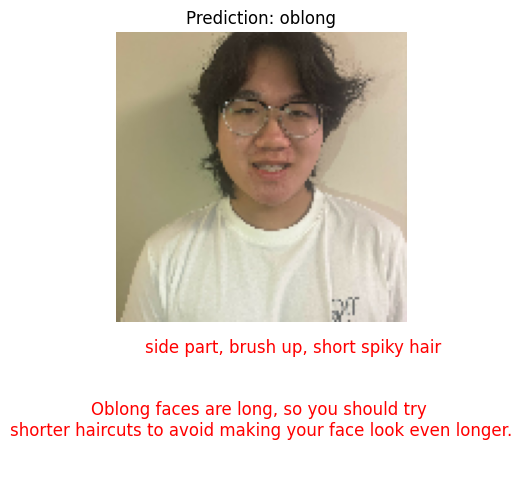

In [9]:
import matplotlib.pyplot as plt
import numpy as np

mapping = {"0": "heart", "1": "oblong", "2": "oval", "3": "round", "4": "square"}

manual_ds = keras.preprocessing.image_dataset_from_directory(
    "manual/", image_size=(128, 128), crop_to_aspect_ratio=True, seed=40
)

face_shapes = []

for images, labels in manual_ds.take(1):
    num_images = images.shape[0]
    if num_images > 1:
        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    else:
        fig, axes = plt.figure(figsize=(5, 5)), plt.gca()

    for i in range(num_images):
        image = images[i].numpy().astype("uint8")
        label = labels[i].numpy()
        predicted_label = np.argmax(
            model.predict(np.expand_dims(image, axis=0)), axis=1
        )[0]
        if num_images > 1:
            ax = axes[i]
        else:
            ax = axes
        img_display = ax.imshow(image)
        prediction = mapping[str(predicted_label)]
        ax.set_title(f"Prediction: {prediction}")
        face_shapes.append(prediction)
        gender = input("Select gender: Male or Female")
        if gender.lower() not in ["male", "female"]:
            raise ValueError("Please select from male and female.")
        recomm = get_optimal_hairstyle(gender, prediction)
        formatted_text = f"""
            {', '.join(recomm["recommendations"])}\n
            {recomm["explanation"]}
        """
        extent = img_display.get_extent()
        ax.text(
            (extent[0] + extent[1]) / 2,
            extent[2] - 2,
            formatted_text,
            fontsize=12,
            color="red",
            ha="center",
            va="top",
        )
        ax.axis("off")

    plt.tight_layout()
    plt.show()